# モンテカルロ積分

\begin{align}
% \begin{flushleft}
{\Large
E[f] = \int p(x) f(x) dx \simeq \frac{1}{N} \sum_{n=1}^N f(x_n)
}
% \end{flushleft}
\end{align}

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import functools
%matplotlib inline

# サンプリングから積分する関数を定義

In [2]:
def sampling_integration(vfunc, sampler, N):
    ret = []
    for i in range(100):
        x = sampler(size=N)
        y = vfunc(x)
        ret.append(np.mean(y))
    return (np.mean(ret), np.std(ret))

#  被積分関数定義

\begin{align}
% \begin{flushleft}
{\Large
(1)\ E_{x \sim U(0,1)}[x] = \int_0^1 1 \cdot x dx \simeq \frac{1}{N} \sum_{n=1}^N x_n
}
\\
{\Large
(2)\ E_{x \sim U(-1,1)}[N(x|0,1)] = \int_{-1}^1 \frac{1}{2} \cdot N(x|0, 1) dx \simeq \frac{1}{N} \sum_{n=1}^N N(x_n) 
}
% \end{flushleft}
\end{align}

In [3]:
# function definition
def f1(x):
    return x

def f2(x):
    return scipy.stats.norm.pdf(x)

vfunc1 = np.vectorize(f1)
vfunc2 = np.vectorize(f2)

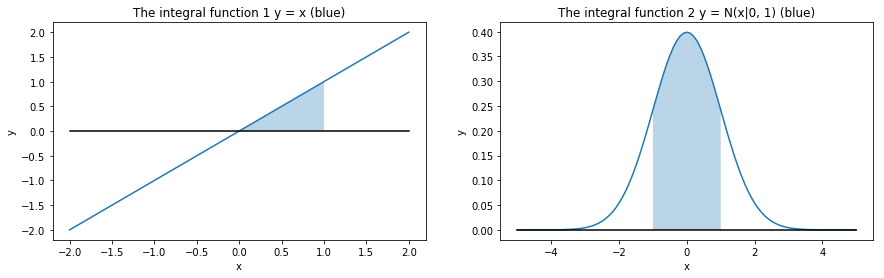

In [4]:
# visuallization
plt.subplot(121)
x = np.arange(-2, 2.1, 0.1)
plt.plot(x, vfunc1(x))
plt.plot(x, [0]*len(x), color="black")
plt.title("The integral function 1 y = x (blue)")
plt.xlabel("x")
plt.ylabel("y")
x = np.arange(0, 1.1, 0.1)
plt.fill_between(x, vfunc1(x), alpha=0.3)

plt.subplot(122)
x = np.arange(-5, 5.1, 0.1)
plt.plot(x, vfunc2(x))
plt.plot(x, [0]*len(x), color="black")
plt.title("The integral function 2 y = N(x|0, 1) (blue)")
plt.xlabel("x")
plt.ylabel("y")
x = np.arange(-1, 1.1, 0.1)
plt.fill_between(x, vfunc2(x), alpha=0.3)

plt.subplots_adjust(left=-1, right=0.9)

plt.show()

# サンプリングする確率密度関数を定義

In [5]:
# function definition
sampler1 = functools.partial(np.random.uniform, low=0, high=1)
sampler2 = functools.partial(np.random.uniform, low=-1, high=1)

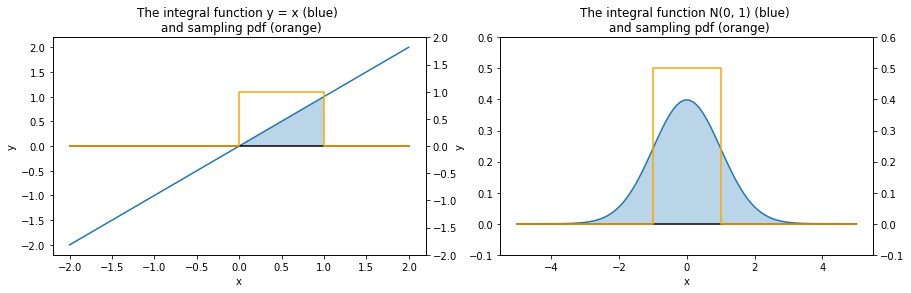

In [6]:
# visualization
def step(x, low=0, high=1):
    if low+1e-10 < x < high+1e-10:
        return 1 / float(high - low)
    else:
        return 0
step1 = np.vectorize(functools.partial(step, low=0, high=1), otypes=[np.float])
step2 = np.vectorize(functools.partial(step, low=-1, high=1), otypes=[np.float])
fig, axes = plt.subplots(ncols=2)
x = np.arange(-2, 2.1, 0.1)
axes[0].plot(x, vfunc1(x))
axes[0].plot(x, [0]*len(x), color="black")
axes[0].set_title("The integral function y = x (blue) \n and sampling pdf (orange)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
ax1 = axes[0].twinx()
ax1.set_ylim([-2, 2])
ax1.step(x, step1(x), color="orange")
x = np.arange(0, 1.1, 0.1)
axes[0].fill_between(x, vfunc1(x), alpha=0.3)

x = np.arange(-5, 5.1, 0.1)
axes[1].plot(x, vfunc2(x))
axes[1].plot(x, [0]*len(x), color="black")
axes[1].set_title("The integral function N(0, 1) (blue) \n and sampling pdf (orange)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
ax2 = axes[1].twinx()
ax2.set_ylim([-0.1, 0.6])
ax2.step(x, step2(x), color="orange")
axes[1].fill_between(x, vfunc2(x), alpha=0.3)
axes[1].set_ylim([-0.1, 0.6])

# plt.subplots_adjust(wspace=0.6, top=0.6)
plt.subplots_adjust(left=-1, right=0.9)

plt.show()

# モンテカルロ積分実行

In [7]:
N = [i**2 for i in range(2, 30)]
ret1 = np.empty((len(N), 2))
ret2 = np.empty((len(N), 2))
for i, n in enumerate(N):
    ret1[i] = sampling_integration(vfunc1, sampler1, n)
    ret2[i] = sampling_integration(vfunc2, sampler2, n)


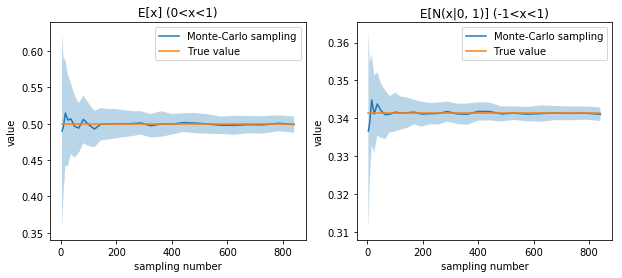

In [8]:
fig1 = plt.subplot(121)
fig1.plot(N, ret1[:, 0], label="Monte-Carlo sampling")
fig1.fill_between(N, ret1[:, 0] - ret1[:, 1], ret1[:, 0] + ret1[:, 1], alpha=0.3)
result = scipy.integrate.quad(vfunc1, 0, 1)[0]
fig1.plot(N, [result]*len(N), label="True value")
fig1.set_xlabel("sampling number")
fig1.set_ylabel("value")
fig1.set_title("E[x] (0<x<1)")
fig1.legend()

fig2 = plt.subplot(122)
fig2.plot(N, ret2[:, 0], label="Monte-Carlo sampling")
fig2.fill_between(N, ret2[:, 0] - ret2[:, 1], ret2[:, 0] + ret2[:, 1], alpha=0.3)
result = scipy.integrate.quad(vfunc2, -1, 1)[0] / 2
fig2.plot(N, [result]*len(N), label="True value")
fig2.set_xlabel("sampling number")
fig2.set_ylabel("value")
fig2.set_title("E[N(x|0, 1)] (-1<x<1)")
fig2.legend()
plt.subplots_adjust(left=-0.1, right=1.2)
plt.show()

# モンテカルロ積分が不利な場合

In [9]:
sampler3 = functools.partial(np.random.uniform, low=5, high=1e5)
vfunc3 = scipy.stats.norm.pdf

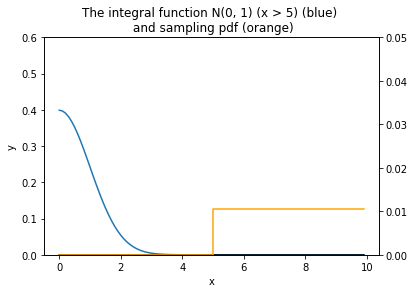

In [10]:
# visualization
step3 = np.vectorize(functools.partial(step, low=5, high=100), otypes=[np.float])
x = np.arange(0, 10, 0.1)
fig, ax1 = plt.subplots()
ax1.plot(x, vfunc2(x))
ax1.plot(x, [0]*len(x), color="black")
ax1.set_title("The integral function N(0, 1) (x > 5) (blue) \n and sampling pdf (orange)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_ylim([0, 0.6])
ax2 = ax1.twinx()
ax2.set_ylim([0, 0.05])
ax2.step(x, step3(x), color="orange")
axes[1].set_ylim([-0.1, 0.6])
plt.show()

# サンプリングする確率密度関数、被積分関数の定義

In [11]:
rv = scipy.stats.expon(loc=4.5)
sampler4 = rv.rvs

def f4(x):
    if x < 4.5:
        return 0
    else:
        return scipy.stats.norm.pdf(x) / scipy.stats.expon(loc=4.5).pdf(x)
vfunc4 = np.vectorize(f4)

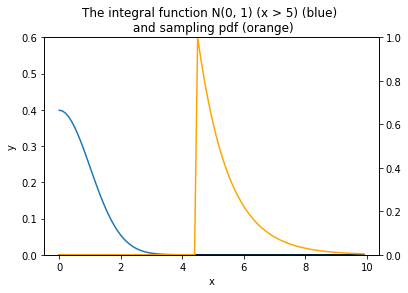

In [12]:
# visualization
x = np.arange(0, 10, 0.1)
fig, ax1 = plt.subplots()
ax1.plot(x, vfunc2(x))
ax1.plot(x, [0]*len(x), color="black")
ax1.set_title("The integral function N(0, 1) (x > 5) (blue) \n and sampling pdf (orange)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_ylim([0, 0.6])
ax2 = ax1.twinx()
ax2.set_ylim([0, 1])
ax2.plot(x, rv.pdf(x), color="orange")
axes[1].set_ylim([-0.1, 0.6])
plt.show()

# 重点サンプリング

In [13]:
ret3 = np.empty((len(N), 2))
ret4 = np.empty((len(N), 2))
for i, n in enumerate(N):
    ret3[i] = sampling_integration(vfunc3, sampler3, n)
    ret4[i] = sampling_integration(vfunc4, sampler4, n)

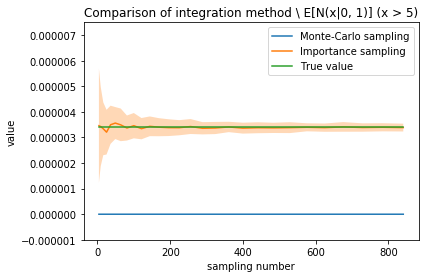

In [14]:
#visualization
plt.title("Comparison of integration method \\ E[N(x|0, 1)] (x > 5)")
plt.plot(N, ret3[:, 0], label="Monte-Carlo sampling")
plt.fill_between(N, ret3[:, 0] - ret3[:, 1], ret3[:, 0] + ret3[:, 1], alpha=0.3)    
plt.plot(N, ret4[:, 0], label="Importance sampling")
plt.fill_between(N, ret4[:, 0] - ret4[:, 1], ret4[:, 0] + ret4[:, 1], alpha=0.3)
result = scipy.integrate.quad(scipy.stats.norm.pdf, 4.5, np.inf)[0]
plt.plot(N, [result]*len(N), label="True value")
plt.legend()
plt.xlabel("sampling number")
plt.ylabel("value")
plt.ylim([-1e-6, 7.5e-6])
plt.show()